In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage.morphology import binary_dilation,binary_erosion

In [2]:
floor_width = 7.90 #m
floor_height = 7.05 #m

In [3]:
floor_color = (122,126,138) # np.asarray([255,133,0])
start_pos_color = (0,255,0)
floor_delta = 7
start_pos_delta = 0

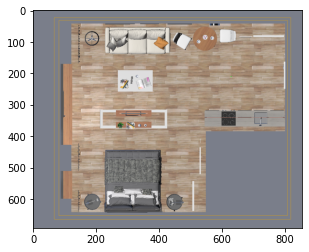

In [5]:
exported_map = np.asarray(Image.open("map/minimap.png"))[:,:,0:3]
plt.imshow(exported_map)

In [9]:
masks_floor = [np.logical_and(exported_map[:,:,i] <= floor_color[i] + floor_delta, exported_map[:,:,i] >= floor_color[i] - floor_delta) for i in range(3)]
masks_start = [np.logical_and(exported_map[:,:,i] <= start_pos_color[i] + start_pos_delta, exported_map[:,:,i] >= start_pos_color[i] - start_pos_delta) for i in range(3)]
map_occupied = np.logical_or(np.logical_and(*masks_floor), np.logical_and(*masks_start))

In [10]:
player_start = np.where(np.logical_and(*masks_start))
player_start_coord = player_start[0][0], player_start[1][0]

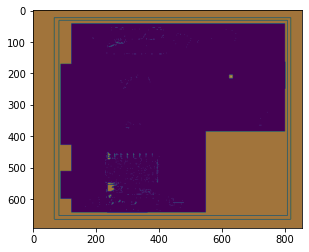

In [11]:
plt.imshow(map_occupied)
plt.imshow(binary_dilation(np.logical_and(*masks_start), structure = np.ones((10,10))), alpha = 0.5)

In [12]:
map_free = np.logical_not(map_occupied)

In [13]:
width_pixel = np.max(np.sum(map_free, axis = -1))
height_pixel = np.max(np.sum(map_free, axis = 0))

length_per_pixel = 1/2 * (floor_width/width_pixel + floor_height/height_pixel) 
map_width = map_free.shape[1]*length_per_pixel
map_height =  map_free.shape[0]*length_per_pixel
print("map shape [m]: ", map_height, map_width)

map shape [m]:  7.436605188992043 9.199037632625995


In [15]:
# Save a dictionary into a pickle file.
import pickle
 
pickle.dump({'map': exported_map,
             'dimensions': {
                 'height': map_height,
                 'width':map_width,
                 'lengthPerPixel': length_per_pixel
             },
             'start': {
                 'top': player_start_coord[0],
                 'left': player_start_coord[1]
             }
            }, open( "minimap.pickle", "wb" ), protocol = 2 )


In [1]:
# Save a dictionary into a pickle file.
import pickle
s = pickle.load(open( "map.pickle", "rb" ))

In [2]:
s['map'].shape

(958, 1220)

In [3]:
s['start']

{'top': 344, 'left': 873}

In [12]:
f2.shape
(958, 1220, 3)

NameError: name 'f2' is not defined

In [13]:
856/1220

0.7016393442622951

In [4]:
s['start']['top'] = 294 + 35

In [5]:
pickle.dump(s, open( "map.pickle", "wb" ))